## Assignment 3: Sentiment Analysis

Dictionary-based sentiment analysis with Python

Download the following CSV file from Kaggle:

https://www.kaggle.com/therohk/million-headlines

This is a dataset of over a million headlines taken from the Australian news source ABC (Start Date: 2003-02-19 ; End Date: 2020-12-31).

Calculate the sentiment score for every headline in the data. You can do this using the spaCyTextBlob approach that we covered in class or any other dictionary-based approach in Python.
- Create and save a plot of sentiment over time with a 1-week rolling average
- Create and save a plot of sentiment over time with a 1-month rolling average
- Make sure that you have clear values on the x-axis and that you include the following: a plot title; labels for the x and y axes; and a legend for the plot
- Write a short summary (no more than a paragraph) describing what the two plots show. You should mention the following points: 1) What (if any) are the general trends? 2) What (if any) inferences might you draw from them?

__General instructions__
- For this assignment, you should upload a standalone .py script which can be executed from the command line.
- Save your script as sentiment.py
- Make sure to include a requirements.txt file and details about where to find the data
- You can either upload the scripts here or push to GitHub and include a link - or both!
- Your code should be clearly documented in a way that allows others to easily follow the structure of your script and to use them from the command line

__Purpose__
- This assignment is designed to test that you have a understanding of:
- how to perform dictionary-based sentiment analysis in Python;
- how to effectively use pandas and spaCy in a simple NLP workflow;
- how to present results visually, working with datetime formats to show trends over time

---

__Dependencies__

In [1]:
# dependencies 
import os
import pandas as pd
import spacy 
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

# initialise spacy 
nlp = spacy.load("en_core_web_sm")

In [2]:
# read file
in_file = os.path.join("..", "data", "abcnews-date-text.csv")
data = pd.read_csv(in_file)

In [65]:
# take a subset
data_subset = data[:50000]
type(data_subset)

pandas.core.frame.DataFrame

In [66]:
# add spacy text blob to nlp pipeline
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

ValueError: [E007] 'text_blob_sentiment' already exists in pipeline. Existing names: ['tagger', 'parser', 'ner', 'text_blob_sentiment']

In [67]:
sentiment_scores = []

for doc in nlp.pipe(data_subset["headline_text"], batch_size = 500):
    sentiment = doc._.sentiment.polarity
    sentiment_scores.append(sentiment)

In [68]:
#sentiment_scores
data_subset

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
49995,20031020,two dead as israel targets hamas militants car
49996,20031020,un agencies pledge to boost maternal health
49997,20031020,uncommon gene may cause poor memory
49998,20031020,united approach sought to fix pacific highway


In [69]:
data_subset.insert(len(data_subset.columns), "sentiment", sentiment_scores)
data_subset

,publish_date,headline_text,sentiment
0,20030219,aba decides against community broadcasting lic...,0.00
1,20030219,act fire witnesses must be aware of defamation,0.25
2,20030219,a g calls for infrastructure protection summit,0.00
3,20030219,air nz staff in aust strike for pay rise,0.00
4,20030219,air nz strike to affect australian travellers,0.00
...,...,...,...
49995,20031020,two dead as israel targets hamas militants car,-0.20
49996,20031020,un agencies pledge to boost maternal health,0.00
49997,20031020,uncommon gene may cause poor memory,0.20
49998,20031020,united approach sought to fix pacific highway,0.00


In [70]:
rolling_data = pd.DataFrame({"sentiment": sentiment_scores}, 
                            index = pd.to_datetime(data_subset["publish_date"], format='%Y%m%d', errors='ignore'))

In [71]:
smoothed_week = rolling_data.sort_index().rolling("7d").mean()

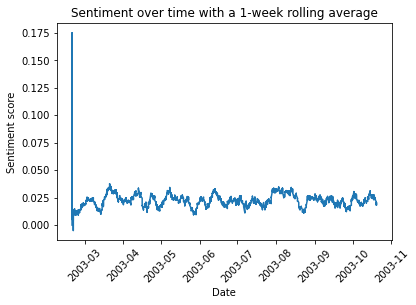

In [82]:
plt.figure()
plt.title("Sentiment over time with a 1-week rolling average")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Sentiment score")
plt.plot(smoothed_week)
plt.savefig('week_sentiment.png', bbox_inches='tight')

In [74]:
smoothed_month = rolling_data.rolling("30d").mean()

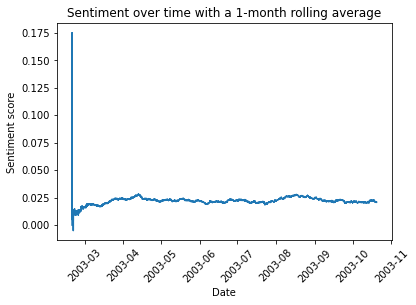

In [77]:
plt.figure()
plt.title("Sentiment over time with a 1-month rolling average")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Sentiment score")
plt.plot(smoothed_month)
plt.show()